## A4 Common Analysis

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

In [2]:
# Import three datasets

mask_use_full = pd.read_csv("/Users/Sabrina/Desktop/Fall 2021/Data 512/Project/mask-use-by-county.csv")
mask_mandates_full = pd.read_csv("/Users/Sabrina/Desktop/Fall 2021/Data 512/Project/Mask_Mandates_20200410_20210815.csv")
confirmed_cases_full = pd.read_csv("/Users/Sabrina/Desktop/Fall 2021/Data 512/Project/RAW_us_confirmed_cases.csv")

In [3]:
# Select only data for Fairfax, Virginia (FIP code: 51059)

mask_use = mask_use_full[mask_use_full['COUNTYFP']==51059]
mask_use

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
2848,51059,0.018,0.016,0.054,0.163,0.748


In [4]:
mask_mandates = mask_mandates_full[mask_mandates_full['County_Name']=='Fairfax County']
mask_mandates

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
757363,VA,Fairfax County,51,59,4/18/2020,2,NaN,NaN,NaN,NaN
757364,VA,Fairfax County,51,59,4/19/2020,2,NaN,NaN,NaN,NaN
757386,VA,Fairfax County,51,59,4/20/2020,2,NaN,NaN,NaN,NaN
757408,VA,Fairfax County,51,59,4/21/2020,2,NaN,NaN,NaN,NaN
757430,VA,Fairfax County,51,59,4/22/2020,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1506696,VA,Fairfax County,51,59,8/11/2021,2,No,Official,https://www.governor.virginia.gov/media/govern...,Va. Exec. Order No. 72 Amend. No. 7 & Pub. Hea...
1506697,VA,Fairfax County,51,59,8/12/2021,2,No,Official,https://www.governor.virginia.gov/media/govern...,Va. Exec. Order No. 72 Amend. No. 7 & Pub. Hea...
1506698,VA,Fairfax County,51,59,8/13/2021,2,No,Official,https://www.governor.virginia.gov/media/govern...,Va. Exec. Order No. 72 Amend. No. 7 & Pub. Hea...
1506699,VA,Fairfax County,51,59,8/14/2021,2,No,Official,https://www.governor.virginia.gov/media/govern...,Va. Exec. Order No. 72 Amend. No. 7 & Pub. Hea...


In [5]:
confirmed_case = confirmed_cases_full[confirmed_cases_full['FIPS']==51059]
confirmed_case

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21
3047,Virginia,Fairfax,84051059,US,USA,840,51059.0,US,38.836776,-77.275658,...,91314,91314,91314,91545,91628,91747,91844,91963,91963,91963


### Data Processing

In [6]:
# Unpivot the confirmed cases data

confirmed_case_cleaned = confirmed_case.iloc[:,10:]

confirmed_cases = confirmed_case_cleaned.melt(id_vars=['Combined_Key'],var_name="date", value_name="cases")

confirmed_cases['date']=pd.to_datetime(confirmed_cases['date'])
confirmed_cases = confirmed_cases.sort_values(by=['date'])
confirmed_cases

,Combined_Key,date,cases
0,"Fairfax, Virginia, US",2020-01-22,0
1,"Fairfax, Virginia, US",2020-01-23,0
2,"Fairfax, Virginia, US",2020-01-24,0
3,"Fairfax, Virginia, US",2020-01-25,0
4,"Fairfax, Virginia, US",2020-01-26,0
...,...,...,...
644,"Fairfax, Virginia, US",2021-10-27,91747
645,"Fairfax, Virginia, US",2021-10-28,91844
646,"Fairfax, Virginia, US",2021-10-29,91963
647,"Fairfax, Virginia, US",2021-10-30,91963


In [7]:
# Select the confirmed cases and mask policy between Feb 1, 2020 to october 15, 2021

policy_selected = mask_mandates[['County_Name','date','Face_Masks_Required_in_Public']]
policy_selected['date']=pd.to_datetime(policy_selected['date'])
policy_selected =policy_selected.sort_values(by=['date'])
policy_selected

<ipython-input-7-e921b80d58f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  policy_selected['date']=pd.to_datetime(policy_selected['date'])


,County_Name,date,Face_Masks_Required_in_Public
757578,Fairfax County,2020-04-10,NaN
757579,Fairfax County,2020-04-11,NaN
757580,Fairfax County,2020-04-12,NaN
757581,Fairfax County,2020-04-13,NaN
757582,Fairfax County,2020-04-14,NaN
...,...,...,...
1506696,Fairfax County,2021-08-11,No
1506697,Fairfax County,2021-08-12,No
1506698,Fairfax County,2021-08-13,No
1506699,Fairfax County,2021-08-14,No


In [8]:
# Create the rows for missing date of mastk policy

before_april = pd.DataFrame([['Fairfax County','2020-02-01', np.nan]],columns=['County_Name','date','Face_Masks_Required_in_Public'])
before_april['date']=pd.to_datetime(before_april['date'])
d = pd.to_datetime('2020-02-01')
while d < pd.to_datetime('2020-04-09'):
    before_april=before_april.append([{'County_Name':'Fairfax County','date':d+pd.DateOffset(1), 'Face_Masks_Required_in_Public':np.nan}], ignore_index=True)
    d = d+pd.DateOffset(1)
    

after_aug = pd.DataFrame([['Fairfax County','2021-08-16','Unknown (after 8/15)']],columns=['County_Name','date','Face_Masks_Required_in_Public'])
after_aug['date']=pd.to_datetime(after_aug['date'])
d = pd.to_datetime('2021-08-16')
while d < pd.to_datetime('2021-10-15'):
    after_aug=after_aug.append([{'County_Name':'Fairfax County','date':d+pd.DateOffset(1), 'Face_Masks_Required_in_Public':'Unknown (after 8/15)'}], ignore_index=True)
    d = d+pd.DateOffset(1)
    

policy_selected = pd.concat([before_april, policy_selected, after_aug])
policy_selected = policy_selected.sort_values(by=['date'])
policy_selected

,County_Name,date,Face_Masks_Required_in_Public
0,Fairfax County,2020-02-01,NaN
1,Fairfax County,2020-02-02,NaN
2,Fairfax County,2020-02-03,NaN
3,Fairfax County,2020-02-04,NaN
4,Fairfax County,2020-02-05,NaN
...,...,...,...
56,Fairfax County,2021-10-11,Unknown (after 8/15)
57,Fairfax County,2021-10-12,Unknown (after 8/15)
58,Fairfax County,2021-10-13,Unknown (after 8/15)
59,Fairfax County,2021-10-14,Unknown (after 8/15)


In [9]:
# Check the index for the start date and end date
confirmed_cases[confirmed_cases['date'].isin(['2020-02-01', '2021-10-15'])]

,Combined_Key,date,cases
10,"Fairfax, Virginia, US",2020-02-01,0
632,"Fairfax, Virginia, US",2021-10-15,90382


In [10]:
confirmed_select = confirmed_cases.iloc[10:633,]
confirmed_select

,Combined_Key,date,cases
10,"Fairfax, Virginia, US",2020-02-01,0
11,"Fairfax, Virginia, US",2020-02-02,0
12,"Fairfax, Virginia, US",2020-02-03,0
13,"Fairfax, Virginia, US",2020-02-04,0
14,"Fairfax, Virginia, US",2020-02-05,0
...,...,...,...
628,"Fairfax, Virginia, US",2021-10-11,89473
629,"Fairfax, Virginia, US",2021-10-12,89944
630,"Fairfax, Virginia, US",2021-10-13,90083
631,"Fairfax, Virginia, US",2021-10-14,90234


In [11]:
policy_confirmed =  pd.merge(left=policy_selected, right=confirmed_select, how='outer', left_on='date', right_on='date')
policy_confirmed.iloc[:,[0,1,2,4]]

,County_Name,date,Face_Masks_Required_in_Public,cases
0,Fairfax County,2020-02-01,NaN,0
1,Fairfax County,2020-02-02,NaN,0
2,Fairfax County,2020-02-03,NaN,0
3,Fairfax County,2020-02-04,NaN,0
4,Fairfax County,2020-02-05,NaN,0
...,...,...,...,...
618,Fairfax County,2021-10-11,Unknown (after 8/15),89473
619,Fairfax County,2021-10-12,Unknown (after 8/15),89944
620,Fairfax County,2021-10-13,Unknown (after 8/15),90083
621,Fairfax County,2021-10-14,Unknown (after 8/15),90234


### Analysis

In [12]:
# Change the Nan for Face_Masks_Required_in_Public to 'unknown'
policy_confirmed.fillna('Unknown', inplace=True)

In [13]:
policy_confirmed

,County_Name,date,Face_Masks_Required_in_Public,Combined_Key,cases
0,Fairfax County,2020-02-01,Unknown,"Fairfax, Virginia, US",0
1,Fairfax County,2020-02-02,Unknown,"Fairfax, Virginia, US",0
2,Fairfax County,2020-02-03,Unknown,"Fairfax, Virginia, US",0
3,Fairfax County,2020-02-04,Unknown,"Fairfax, Virginia, US",0
4,Fairfax County,2020-02-05,Unknown,"Fairfax, Virginia, US",0
...,...,...,...,...,...
618,Fairfax County,2021-10-11,Unknown (after 8/15),"Fairfax, Virginia, US",89473
619,Fairfax County,2021-10-12,Unknown (after 8/15),"Fairfax, Virginia, US",89944
620,Fairfax County,2021-10-13,Unknown (after 8/15),"Fairfax, Virginia, US",90083
621,Fairfax County,2021-10-14,Unknown (after 8/15),"Fairfax, Virginia, US",90234


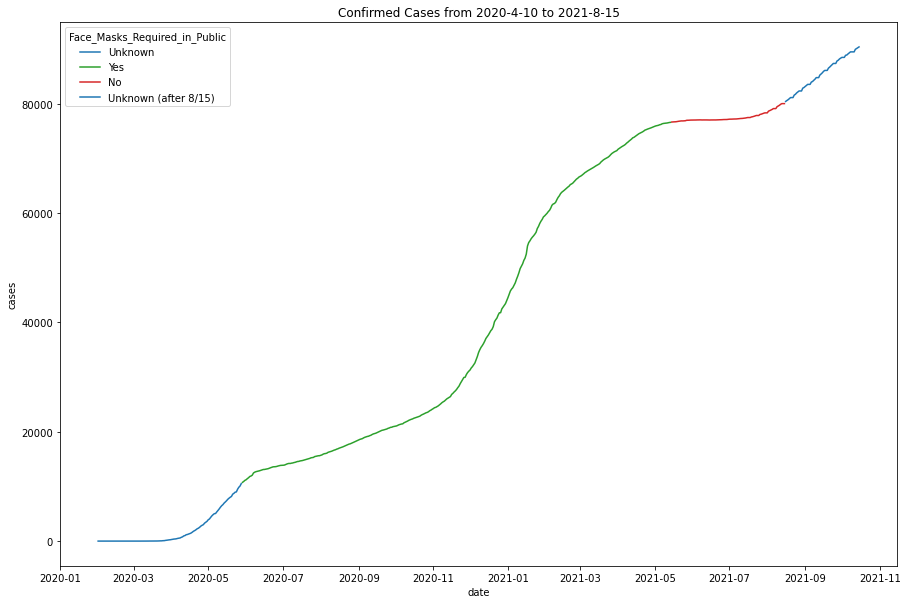

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
palette ={"Unknown": "C0", "Yes": "tab:green", "No": "tab:red", "Unknown (after 8/15)": "C0"}

ax = sns.lineplot(data=policy_confirmed, 
                x='date', y='cases', 
                hue='Face_Masks_Required_in_Public',
                palette = palette).set(title='Confirmed Cases from 2020-4-10 to 2021-8-15')
plt.show()

In [15]:
# Calculate the change in confirmed cases
policy_confirmed['case_diff'] = policy_confirmed['cases'] - policy_confirmed['cases'].shift(1)
policy_confirmed

,County_Name,date,Face_Masks_Required_in_Public,Combined_Key,cases,case_diff
0,Fairfax County,2020-02-01,Unknown,"Fairfax, Virginia, US",0,NaN
1,Fairfax County,2020-02-02,Unknown,"Fairfax, Virginia, US",0,0.0
2,Fairfax County,2020-02-03,Unknown,"Fairfax, Virginia, US",0,0.0
3,Fairfax County,2020-02-04,Unknown,"Fairfax, Virginia, US",0,0.0
4,Fairfax County,2020-02-05,Unknown,"Fairfax, Virginia, US",0,0.0
...,...,...,...,...,...,...
618,Fairfax County,2021-10-11,Unknown (after 8/15),"Fairfax, Virginia, US",89473,0.0
619,Fairfax County,2021-10-12,Unknown (after 8/15),"Fairfax, Virginia, US",89944,471.0
620,Fairfax County,2021-10-13,Unknown (after 8/15),"Fairfax, Virginia, US",90083,139.0
621,Fairfax County,2021-10-14,Unknown (after 8/15),"Fairfax, Virginia, US",90234,151.0


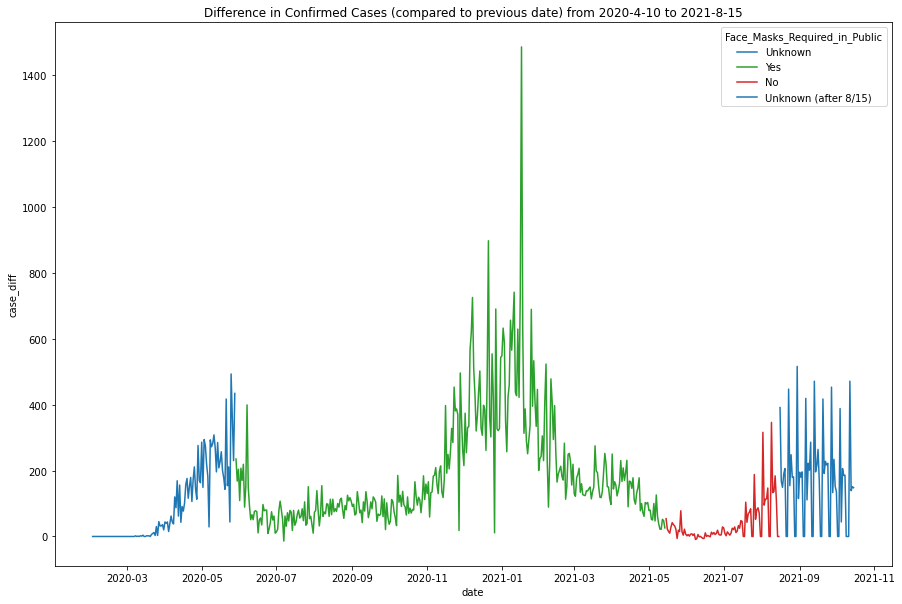

In [16]:
# Plot the change in confirmed cases over time

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(data=policy_confirmed, 
                x='date', y='case_diff', 
                hue='Face_Masks_Required_in_Public',
                palette = palette).set(title='Difference in Confirmed Cases (compared to previous date) from 2020-4-10 to 2021-8-15')
plt.show()

In [17]:
# Try to fit the case over time using a function 

function_df = policy_confirmed[['date','Face_Masks_Required_in_Public','cases']].sort_values(by=['date']).reset_index()
function_df

,index,date,Face_Masks_Required_in_Public,cases
0,0,2020-02-01,Unknown,0
1,1,2020-02-02,Unknown,0
2,2,2020-02-03,Unknown,0
3,3,2020-02-04,Unknown,0
4,4,2020-02-05,Unknown,0
...,...,...,...,...
618,618,2021-10-11,Unknown (after 8/15),89473
619,619,2021-10-12,Unknown (after 8/15),89944
620,620,2021-10-13,Unknown (after 8/15),90083
621,621,2021-10-14,Unknown (after 8/15),90234


In [18]:
# A polynomial of degree 9 seems a good approx. of the trend of confirmed cases 
z = np.polyfit(function_df['index'], function_df['cases'], 9)
p = np.poly1d(z)

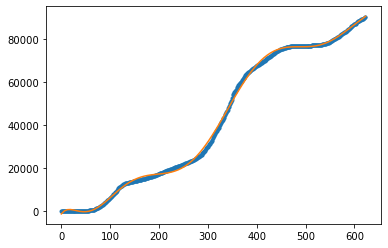

In [19]:
xp = np.linspace(0, 623, 100)
plt.plot(function_df['index'], function_df['cases'], '.', xp, p(xp), '-')


In [20]:
# Take derivative of the polynomial p
p_d = np.polyder(p)
p, p_d

(poly1d([ 1.16347754e-17, -3.54011500e-14,  4.45457737e-11, -2.98525846e-08,
         1.14304802e-05, -2.49272817e-03,  2.90781132e-01, -1.53492153e+01,
         3.09934017e+02, -1.42771242e+03]),
 poly1d([ 1.04712978e-16, -2.83209200e-13,  3.11820416e-10, -1.79115507e-07,
         5.71524011e-05, -9.97091267e-03,  8.72343396e-01, -3.06984305e+01,
         3.09934017e+02]))

In [21]:
# Calculate the derivative values for index 0 t0 492

function_df['derivative']=p_d(function_df['index'])
function_df

,index,date,Face_Masks_Required_in_Public,cases,derivative
0,0,2020-02-01,Unknown,0,309.934017
1,1,2020-02-02,Unknown,0,280.098016
2,2,2020-02-03,Unknown,0,251.947671
3,3,2020-02-04,Unknown,0,225.425187
4,4,2020-02-05,Unknown,0,200.474099
...,...,...,...,...,...
618,618,2021-10-11,Unknown (after 8/15),89473,168.873790
619,619,2021-10-12,Unknown (after 8/15),89944,169.358304
620,620,2021-10-13,Unknown (after 8/15),90083,169.972177
621,621,2021-10-14,Unknown (after 8/15),90234,170.727726


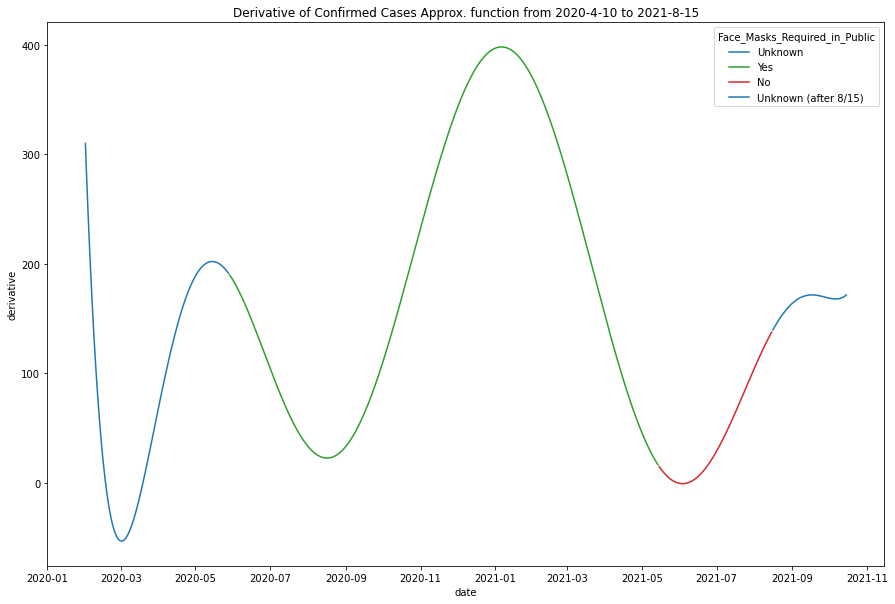

In [22]:
# Plot derivate of the approx. confirmed case function over time

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(data=function_df, 
                x='date', y='derivative', 
                hue='Face_Masks_Required_in_Public',
                palette = palette).set(title='Derivative of Confirmed Cases Approx. function from 2020-4-10 to 2021-8-15')
plt.show()

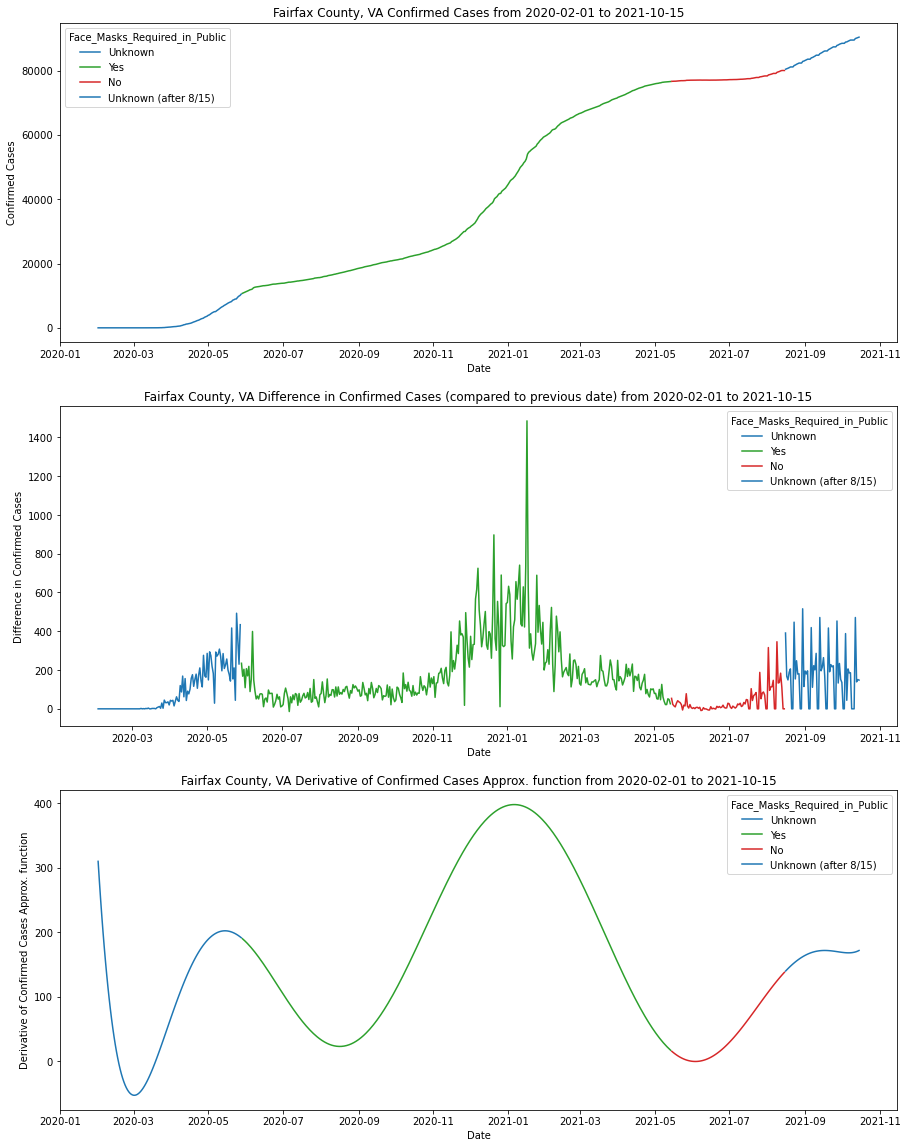

In [23]:
# Put these three plots together for export

fig, axes = plt.subplots(3,1,figsize=(15,20))

s1 = sns.lineplot(ax=axes[0],data=policy_confirmed, 
                x='date', y='cases', 
                hue='Face_Masks_Required_in_Public',
                palette = palette).set(
                title='Fairfax County, VA Confirmed Cases from 2020-02-01 to 2021-10-15',
                xlabel = "Date", ylabel = "Confirmed Cases")


sns.lineplot(ax=axes[1],data=policy_confirmed, 
                x='date', y='case_diff', 
                hue='Face_Masks_Required_in_Public',
                palette = palette).set(
                title='Fairfax County, VA Difference in Confirmed Cases (compared to previous date) from 2020-02-01 to 2021-10-15',
                xlabel = "Date", ylabel = "Difference in Confirmed Cases")


sns.lineplot(ax=axes[2],data=function_df, 
                x='date', y='derivative', 
                hue='Face_Masks_Required_in_Public',
                palette = palette).set(
                title='Fairfax County, VA Derivative of Confirmed Cases Approx. function from 2020-02-01 to 2021-10-15',
                xlabel = "Date", ylabel = "Derivative of Confirmed Cases Approx. function")

plt.show()

### Additionally Analysis on Vaccine 

In [24]:
# Read in the vaccine data 
vaccine_full = pd.read_csv("/Users/Sabrina/Desktop/Fall 2021/Data 512/Project/Vaccinations.csv")
vaccine_full

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,11/01/2021,13095,44,Dougherty County,GA,24.2,21257,21257.0,28.8,19109,...,D,13.0,13.0,13.0,13.0,Metro,1.0,1.0,1.0,1.0
1,11/01/2021,29005,44,Atchison County,MO,51.4,2642,2642.0,59.0,2543,...,A,4.0,4.0,4.0,4.0,Non-metro,8.0,8.0,8.0,8.0
2,11/01/2021,22119,44,Webster Parish,LA,38.9,14904,14903.0,45.7,14226,...,D,14.0,15.0,15.0,16.0,Metro,2.0,3.0,3.0,4.0
3,11/01/2021,36103,44,Suffolk County,NY,67.5,997066,997019.0,77.8,935489,...,A,4.0,4.0,4.0,4.0,Metro,4.0,4.0,4.0,4.0
4,11/01/2021,51075,44,Goochland County,VA,61.8,14682,14649.0,68.8,13819,...,A,4.0,4.0,4.0,4.0,Metro,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063378,12/13/2020,55111,51,Sauk County,WI,0.0,0,0.0,0.0,0,...,A,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
1063379,12/13/2020,21207,51,Russell County,KY,0.0,0,0.0,0.0,0,...,D,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN
1063380,12/13/2020,48441,51,Taylor County,TX,0.0,0,0.0,0.0,0,...,C,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1063381,12/13/2020,46119,51,Sully County,SD,0.0,0,0.0,0.0,0,...,A,NaN,NaN,NaN,NaN,Non-metro,NaN,NaN,NaN,NaN


In [25]:
vaccine = vaccine_full[vaccine_full['Recip_County']=='Fairfax County']
vaccine['Date'] = pd.to_datetime(vaccine['Date'])
vaccine = vaccine.sort_values(by=['Date']).reset_index()
vaccine

<ipython-input-25-0261f54bcd97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine['Date'] = pd.to_datetime(vaccine['Date'])


,index,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,1060372,2020-12-13,51059,51,Fairfax County,VA,0.0,0,0.0,0.0,...,A,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1,1058714,2020-12-14,51059,51,Fairfax County,VA,0.0,0,0.0,0.0,...,A,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
2,1056609,2020-12-15,51059,51,Fairfax County,VA,0.0,0,0.0,0.0,...,A,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
3,1052759,2020-12-16,51059,51,Fairfax County,VA,0.0,0,0.0,0.0,...,A,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
4,1048861,2020-12-17,51059,51,Fairfax County,VA,0.0,0,0.0,0.0,...,A,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,16263,2021-10-28,51059,43,Fairfax County,VA,69.2,793652,791158.0,81.4,...,A,4.0,4.0,4.0,4.0,Metro,4.0,4.0,4.0,4.0
320,11503,2021-10-29,51059,43,Fairfax County,VA,69.2,793803,791309.0,81.4,...,A,4.0,4.0,4.0,4.0,Metro,4.0,4.0,4.0,4.0
321,7780,2021-10-30,51059,43,Fairfax County,VA,69.2,794253,791759.0,81.5,...,A,4.0,4.0,4.0,4.0,Metro,4.0,4.0,4.0,4.0
322,5246,2021-10-31,51059,44,Fairfax County,VA,69.3,794858,792364.0,81.5,...,A,4.0,4.0,4.0,4.0,Metro,4.0,4.0,4.0,4.0


In [26]:
vaccine[vaccine['Date']=='2021-10-15']

,index,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,...,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
306,56641,2021-10-15,51059,41,Fairfax County,VA,68.4,784792,782299.0,80.5,...,A,4.0,4.0,4.0,4.0,Metro,4.0,4.0,4.0,4.0


In [27]:
# Combine the vaccine data to policy_confirmed data for 2020-12-13 to 2021-8-15

vaccine_selected = vaccine.iloc[:307, np.r_[1, 6:23]]

policy_vaccine_confirmed = pd.merge(left=policy_confirmed, right=vaccine_selected, how='outer', left_on='date', right_on='Date')
policy_vaccine_confirmed

,County_Name,date,Face_Masks_Required_in_Public,Combined_Key,cases,case_diff,Date,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,...,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct
0,Fairfax County,2020-02-01,Unknown,"Fairfax, Virginia, US",0,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fairfax County,2020-02-02,Unknown,"Fairfax, Virginia, US",0,0.0,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fairfax County,2020-02-03,Unknown,"Fairfax, Virginia, US",0,0.0,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fairfax County,2020-02-04,Unknown,"Fairfax, Virginia, US",0,0.0,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fairfax County,2020-02-05,Unknown,"Fairfax, Virginia, US",0,0.0,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,Fairfax County,2021-10-11,Unknown (after 8/15),"Fairfax, Virginia, US",89473,0.0,2021-10-11,68.1,782039.0,779546.0,...,81.3,83.3,875205.0,76.3,871351.0,89.6,790202.0,89.7,148101.0,92.3
619,Fairfax County,2021-10-12,Unknown (after 8/15),"Fairfax, Virginia, US",89944,471.0,2021-10-12,68.2,782184.0,779691.0,...,81.3,83.3,875583.0,76.3,871729.0,89.7,790560.0,89.8,148257.0,92.4
620,Fairfax County,2021-10-13,Unknown (after 8/15),"Fairfax, Virginia, US",90083,139.0,2021-10-13,68.2,782624.0,780131.0,...,81.3,83.3,876165.0,76.4,872310.0,89.7,791064.0,89.8,148415.0,92.5
621,Fairfax County,2021-10-14,Unknown (after 8/15),"Fairfax, Virginia, US",90234,151.0,2021-10-14,68.3,784034.0,781541.0,...,81.5,83.3,877601.0,76.5,873746.0,89.9,792412.0,90.0,148878.0,92.8


In [28]:
policy_vaccine_confirmed_short = policy_vaccine_confirmed[['date','Face_Masks_Required_in_Public','cases','Series_Complete_Pop_Pct']]

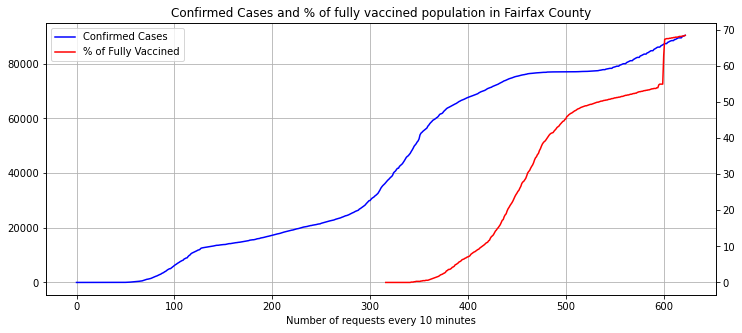

In [29]:

plt.figure(figsize=(12,5))

plt.xlabel('Number of requests every 10 minutes')

ax1 = policy_vaccine_confirmed_short.cases.plot(color='blue', grid=True, label='Confirmed Cases')
ax2 = policy_vaccine_confirmed_short.Series_Complete_Pop_Pct.plot(color='red', grid=True, secondary_y=True, label='% of Fully Vaccined')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.title("Confirmed Cases and % of fully vaccined population in Fairfax County")
plt.show()

## A6 Youth Mental Health During Pandemic in Fairfax County, VA

In [30]:
#Youth mental health data (montly from Feb. 2020 to Feb. 2021)
mental = pd.read_csv("/Users/Sabrina/Desktop/Fall 2021/Data 512/Project/youth_mental.csv")

In [31]:
mental['month']=pd.to_datetime(mental['month']).dt.to_period('M')

In [32]:
mental

,month,intensive_treatment,outpatient_services,crisis_intervention_service,requiring_hospitalization,perc_immediate_treatment
0,2020-02,134,1025,101,42,0.60
1,2020-03,142,994,86,29,0.51
2,2020-04,142,982,24,21,0.64
3,2020-05,142,916,34,27,0.35
4,2020-06,149,865,44,30,0.54
5,2020-07,137,827,51,18,0.45
6,2020-08,136,790,60,23,0.58
7,2020-09,132,750,77,26,0.54
8,2020-10,120,749,86,30,0.54
9,2020-11,109,743,77,28,0.46


<AxesSubplot:xlabel='month'>

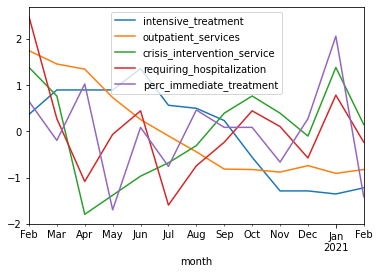

In [33]:
# Check the overall trend after normalizing each column 
mental_index = mental.set_index('month')
mental_index=(mental_index-mental_index.mean())/mental_index.std()
mental_index.plot()

Loos like the intensice treatment and outpatient service is decreasing but the decreasing treand is now showing in crisis intervention service, number of youth required hospo=italization, or prcentage of youth required immediate treatment 

In [34]:
# calculate monthly average of confirmed cases
confirmed_monthly = confirmed_cases.groupby(pd.PeriodIndex(confirmed_cases['date'], freq="M"))['cases'].mean().reset_index()

In [35]:
confirmed_monthly

,date,cases
0,2020-01,0.000000
1,2020-02,0.000000
2,2020-03,43.290323
3,2020-04,1563.366667
4,2020-05,7388.032258
5,2020-06,12927.766667
6,2020-07,14731.580645
7,2020-08,17004.419355
8,2020-09,19785.066667
9,2020-10,22451.516129


In [36]:
# combine the two dataset 
mental_cases  =  pd.merge(left=confirmed_monthly, right=mental, how='inner', left_on='date', right_on='month')
mental_cases

,date,cases,month,intensive_treatment,outpatient_services,crisis_intervention_service,requiring_hospitalization,perc_immediate_treatment
0,2020-02,0.000000,2020-02,134,1025,101,42,0.60
1,2020-03,43.290323,2020-03,142,994,86,29,0.51
2,2020-04,1563.366667,2020-04,142,982,24,21,0.64
3,2020-05,7388.032258,2020-05,142,916,34,27,0.35
4,2020-06,12927.766667,2020-06,149,865,44,30,0.54
5,2020-07,14731.580645,2020-07,137,827,51,18,0.45
6,2020-08,17004.419355,2020-08,136,790,60,23,0.58
7,2020-09,19785.066667,2020-09,132,750,77,26,0.54
8,2020-10,22451.516129,2020-10,120,749,86,30,0.54
9,2020-11,27063.166667,2020-11,109,743,77,28,0.46


### Analysis 1: Check pari-wise correlation of the confirmed cases and different metric from mental health report 

In [37]:
import pingouin as pg

In [38]:
# Calculate the correlation coefficient
pg.pairwise_corr(mental_cases, method='pearson')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,cases,intensive_treatment,pearson,two-sided,13,-0.834783,"[-0.95, -0.53]",0.000385,94.422,0.974268
1,cases,outpatient_services,pearson,two-sided,13,-0.780186,"[-0.93, -0.4]",0.001654,28.802,0.925235
2,cases,crisis_intervention_service,pearson,two-sided,13,0.308296,"[-0.29, 0.73]",0.305450,0.55,0.179919
3,cases,requiring_hospitalization,pearson,two-sided,13,-0.084170,"[-0.61, 0.49]",0.784557,0.353,0.057749
4,cases,perc_immediate_treatment,pearson,two-sided,13,0.004059,"[-0.55, 0.55]",0.989499,0.341,0.048989
5,intensive_treatment,outpatient_services,pearson,two-sided,13,0.708151,"[0.26, 0.91]",0.006754,9.275,0.820744
6,intensive_treatment,crisis_intervention_service,pearson,two-sided,13,-0.523988,"[-0.83, 0.04]",0.066057,1.578,0.476154
7,intensive_treatment,requiring_hospitalization,pearson,two-sided,13,-0.084786,"[-0.61, 0.49]",0.783015,0.353,0.057879
8,intensive_treatment,perc_immediate_treatment,pearson,two-sided,13,-0.100457,"[-0.62, 0.48]",0.744021,0.358,0.061528
9,outpatient_services,crisis_intervention_service,pearson,two-sided,13,-0.212059,"[-0.68, 0.38]",0.486727,0.425,0.107540


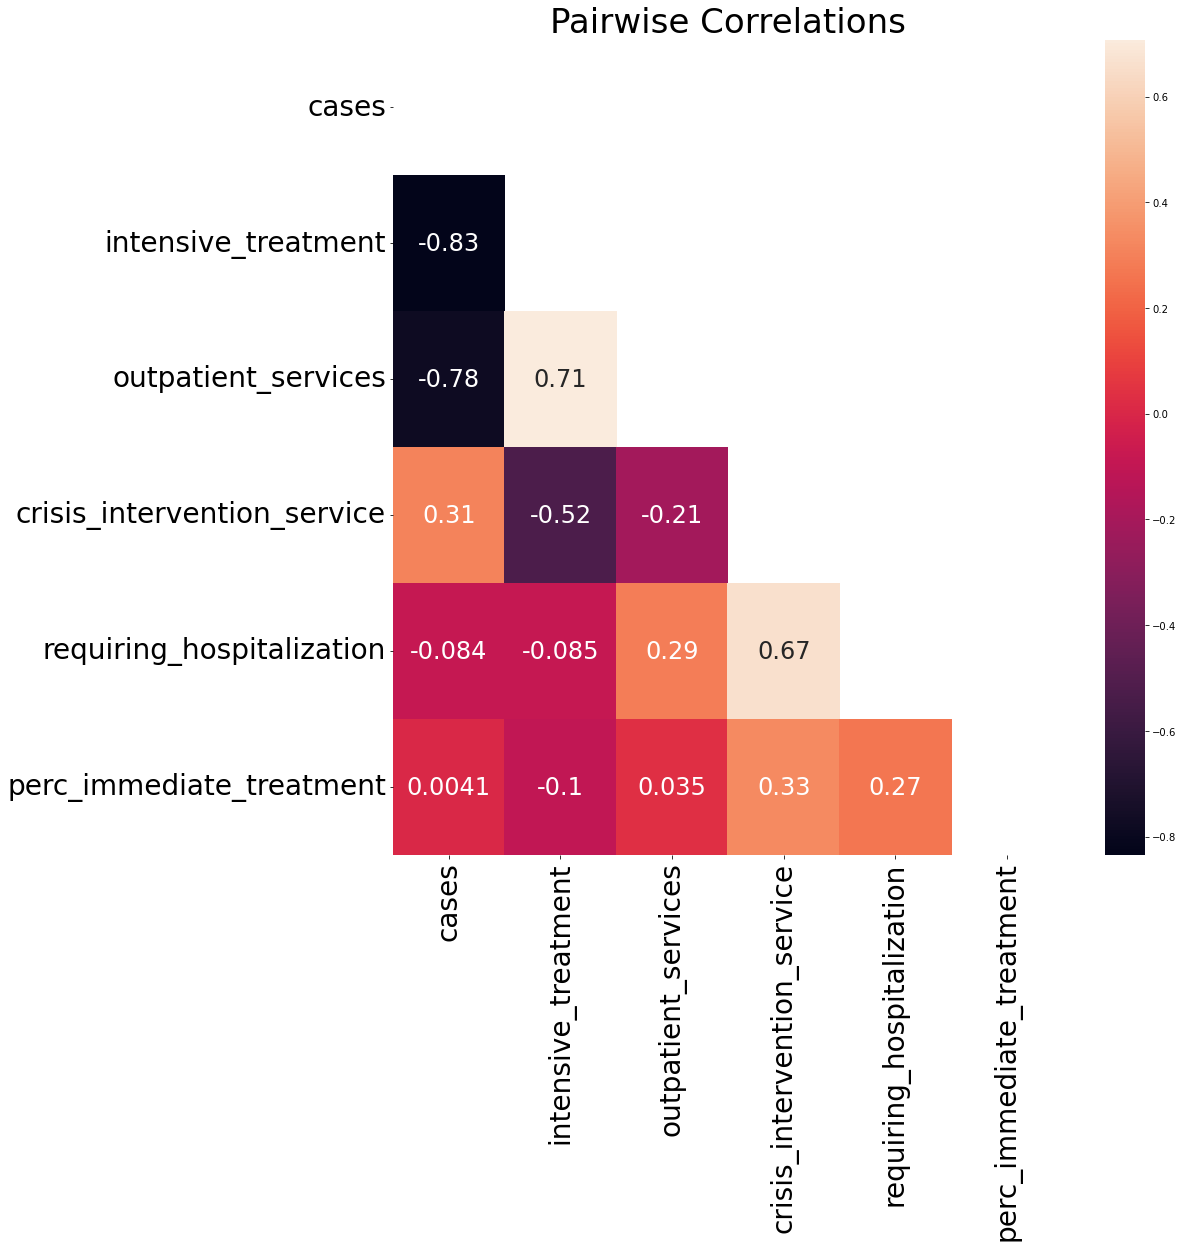

In [59]:
# Plot the correlation coefficient as a heatmap
plt.figure(figsize=(15, 15))

mask = np.triu(np.ones_like(mental_cases.corr(), dtype=np.bool))
heatmap=sns.heatmap(mental_cases.corr(),mask = mask,annot=True,
                    annot_kws={"fontsize":24} ,xticklabels=True, yticklabels=True)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize = 28)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize = 28, rotation=0)
heatmap.set_title('Pairwise Correlations', fontdict={'fontsize':34}, pad=2);

We can see confirmed cases and intensive treatment has a strong negative correlation and the same with outpatient services. Correlation between intensive treatment & outpatient services and crisis intervention services & requireing hospitalization are moderatly strong. 

### Analysis 2: Fit regression model 

In [40]:
import statsmodels.api as sm

In [41]:
# Fit and summarize OLS model (intensive_treatment ~ cases)
mod1 = sm.OLS(mental_cases['intensive_treatment'], sm.add_constant(mental_cases['cases'], prepend=False))

res1 = mod1.fit()

print(res1.summary())

                             OLS Regression Results                            
Dep. Variable:     intensive_treatment   R-squared:                       0.697
Model:                             OLS   Adj. R-squared:                  0.669
Method:                  Least Squares   F-statistic:                     25.29
Date:                 Tue, 07 Dec 2021   Prob (F-statistic):           0.000385
Time:                         11:21:49   Log-Likelihood:                -45.452
No. Observations:                   13   AIC:                             94.90
Df Residuals:                       11   BIC:                             96.03
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cases         -0.0006      0.000     -5.02

/Users/Sabrina/miniconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [42]:
# Fit and summarize OLS model (outpatient_services ~ cases)
mod2 = sm.OLS(mental_cases['outpatient_services'], sm.add_constant(mental_cases['cases'], prepend=False))

res2 = mod2.fit()

print(res2.summary())

                             OLS Regression Results                            
Dep. Variable:     outpatient_services   R-squared:                       0.609
Model:                             OLS   Adj. R-squared:                  0.573
Method:                  Least Squares   F-statistic:                     17.11
Date:                 Tue, 07 Dec 2021   Prob (F-statistic):            0.00165
Time:                         11:21:49   Log-Likelihood:                -72.598
No. Observations:                   13   AIC:                             149.2
Df Residuals:                       11   BIC:                             150.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cases         -0.0042      0.001     -4.13

/Users/Sabrina/miniconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


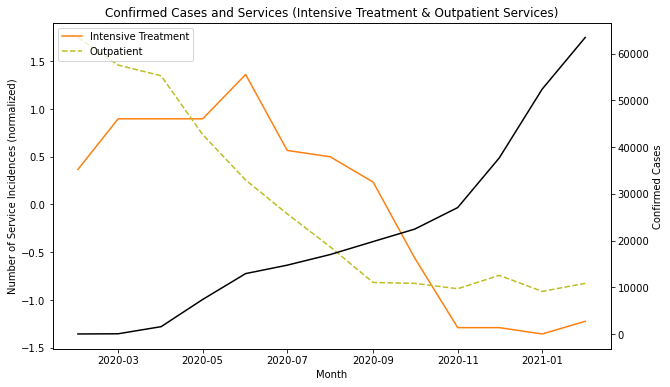

In [43]:
# Plot the line chart of confirmed cases and intensive treatment, outpatient services
mental_cases['date']=pd.to_datetime(mental_cases['date'].astype(str))

fig, ax = plt.subplots(figsize=(10, 6))
axb = ax.twinx()

# Same as above
ax.set_xlabel('Month')
ax.set_ylabel('Number of Service Incidences (normalized)')
ax.set_title('Confirmed Cases and Services (Intensive Treatment & Outpatient Services)')


# Plotting on the first y-axis
ax.plot(mental_cases['date'], (mental_cases['intensive_treatment']-mental_cases['intensive_treatment'].mean())/(mental_cases['intensive_treatment'].std()), color='tab:orange', label='Intensive Treatment')
ax.plot(mental_cases['date'], (mental_cases['outpatient_services']-mental_cases['outpatient_services'].mean())/(mental_cases['outpatient_services'].std()), color='tab:olive', linestyle='--', label='Outpatient')
ax.legend(loc='upper left');

# Plotting on the second y-axis
axb.set_ylabel('Confirmed Cases')
axb.plot(mental_cases['date'], mental_cases['cases'],color='black', label='pressure')



###  Look at trend before covid

In [44]:
# Read in the dataset contains full youth mental health data
full_mental = pd.read_csv('youth_mental_full.csv')

In [45]:
full_mental

,month,intensive_treatment,outpatient_services,crisis_intervention_service,requiring_hospitalization,perc_immediate_treatment
0,2018-07,106,867,55,21,0.55
1,2018-08,114,816,70,23,0.64
2,2018-09,116,788,102,33,0.60
3,2018-10,115,820,127,36,0.56
4,2018-11,103,830,120,24,0.52
5,2018-12,103,840,121,25,0.59
6,2019-01,104,878,103,44,0.53
7,2019-02,111,872,109,33,0.66
8,2019-03,113,918,120,40,0.56
9,2019-04,111,968,103,33,0.62


In [46]:
full_mental['month']=pd.to_datetime(full_mental['month']).dt.to_period('M')

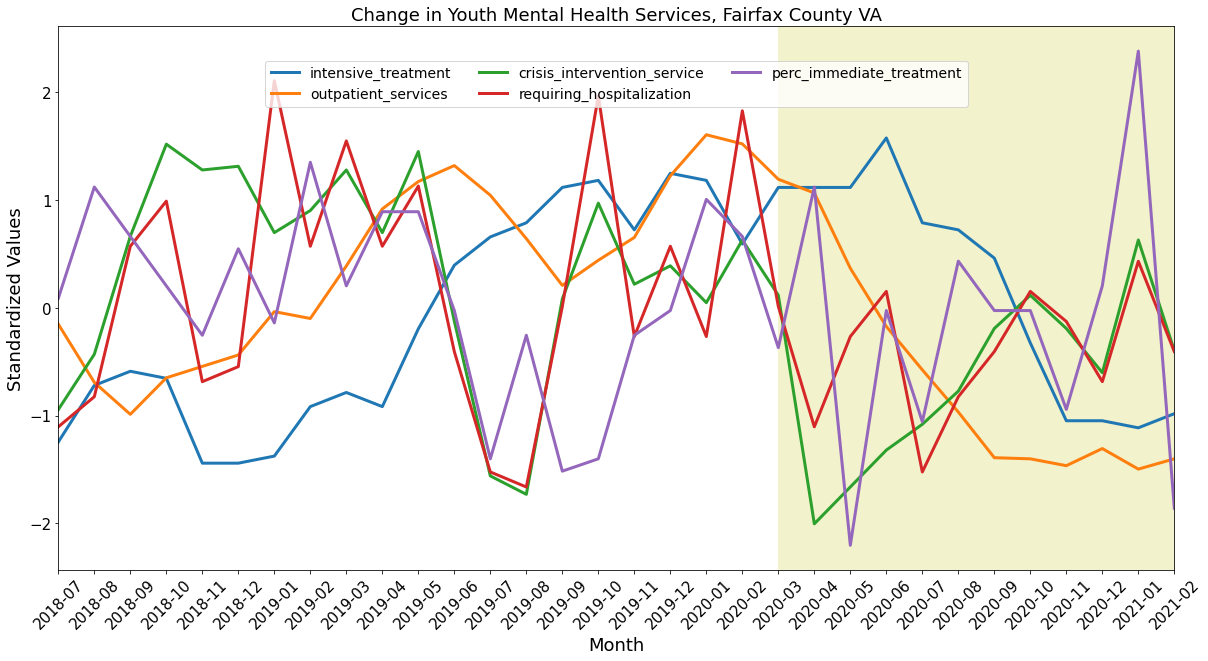

In [47]:

# Check the overall trend after normalizing each column 
full_mental_index = full_mental.set_index('month')
full_mental_index=(full_mental_index-full_mental_index.mean())/full_mental_index.std()



ax = full_mental_index.plot(linewidth=3, fontsize=15,figsize=(20, 10))
ax.set_xticks(full_mental_index.index)
ax.set_xticklabels(full_mental_index.index, rotation=45)
ax.set_xlabel('Month', fontsize=18);
ax.set_ylabel('Standardized Values', fontsize=18);
ax.set_title('Change in Youth Mental Health Services, Fairfax County VA',fontsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=14)
plt.axvspan('2020-03', '2021-02', color='y', alpha=0.2, lw=0)

### Plotting the rest three variables with COVID-19  confirmed cases

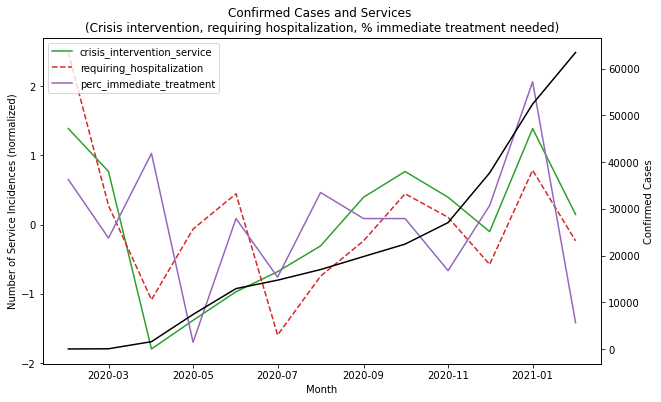

In [61]:

fig, ax = plt.subplots(figsize=(10, 6))
axb = ax.twinx()

# Same as above
ax.set_xlabel('Month')
ax.set_ylabel('Number of Service Incidences (normalized)')
ax.set_title('Confirmed Cases and Services \n(Crisis intervention, requiring hospitalization, % immediate treatment needed)')


# Plotting on the first y-axis
ax.plot(mental_cases['date'], (mental_cases['crisis_intervention_service']-mental_cases['crisis_intervention_service'].mean())/(mental_cases['crisis_intervention_service'].std()), color='tab:green', label='crisis_intervention_service')
ax.plot(mental_cases['date'], (mental_cases['requiring_hospitalization']-mental_cases['requiring_hospitalization'].mean())/(mental_cases['requiring_hospitalization'].std()), color='tab:red', linestyle='--', label='requiring_hospitalization')
ax.plot(mental_cases['date'], (mental_cases['perc_immediate_treatment']-mental_cases['perc_immediate_treatment'].mean())/(mental_cases['perc_immediate_treatment'].std()), color='tab:purple', label='perc_immediate_treatment')

ax.legend(loc='upper left');
ax.legend(loc='upper left');

# Plotting on the second y-axis
axb.set_ylabel('Confirmed Cases')
axb.plot(mental_cases['date'], mental_cases['cases'],color='black', label='pressure')

